In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
from pandas_datareader import DataReader

In [0]:
from datetime import datetime

In [0]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [0]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [0]:
for stock in tech_list:
  globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,235.560632,231.183281,233.135691,233.604743,2.942796e+07,232.235833
std,45.378325,44.337482,44.795330,45.036509,1.275871e+07,45.643148
min,173.070007,169.500000,170.320007,172.500000,1.136200e+07,170.271317
25%,200.990005,198.169998,199.460007,199.500000,2.114340e+07,197.514709
50%,215.309998,211.300003,213.860001,213.039993,2.633950e+07,211.501556
75%,268.000000,264.230011,266.600006,266.920013,3.339690e+07,266.288025
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-03-06 to 2020-03-05
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


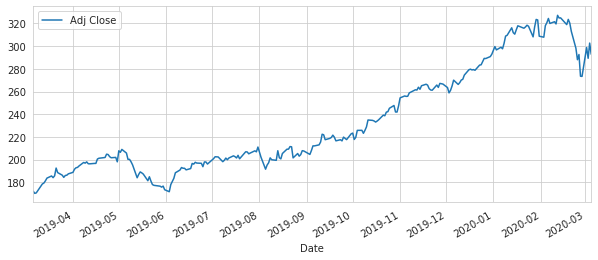

In [10]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

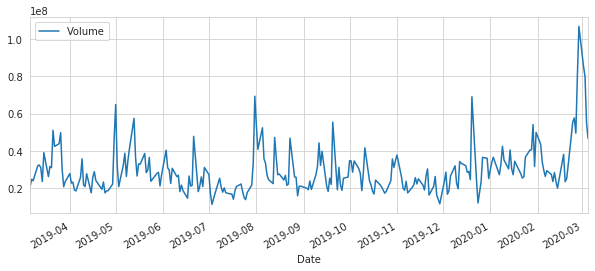

In [11]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [0]:
ma_day = [10,20,50]
for ma in ma_day:
  column_name = 'MA {}'.format(ma)
  AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2019-03-06,175.490005,173.940002,174.669998,174.520004,20810400.0,172.265228,NaN,NaN,NaN
2019-03-07,174.440002,172.020004,173.869995,172.500000,24796400.0,170.271317,NaN,NaN,NaN
2019-03-08,173.070007,169.500000,170.320007,172.910004,23999400.0,170.676025,NaN,NaN,NaN
2019-03-11,179.119995,175.350006,175.490005,178.899994,32011000.0,176.588608,NaN,NaN,NaN
2019-03-12,182.669998,179.369995,180.000000,180.910004,32467600.0,178.572662,NaN,NaN,NaN


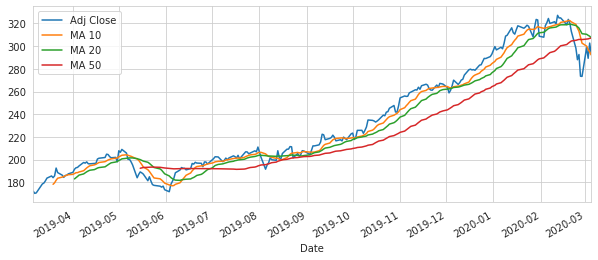

In [14]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [0]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [16]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2019-03-06,175.490005,173.940002,174.669998,174.520004,20810400.0,172.265228,NaN,NaN,NaN,NaN
2019-03-07,174.440002,172.020004,173.869995,172.500000,24796400.0,170.271317,NaN,NaN,NaN,-0.011575
2019-03-08,173.070007,169.500000,170.320007,172.910004,23999400.0,170.676025,NaN,NaN,NaN,0.002377
2019-03-11,179.119995,175.350006,175.490005,178.899994,32011000.0,176.588608,NaN,NaN,NaN,0.034642
2019-03-12,182.669998,179.369995,180.000000,180.910004,32467600.0,178.572662,NaN,NaN,NaN,0.011235


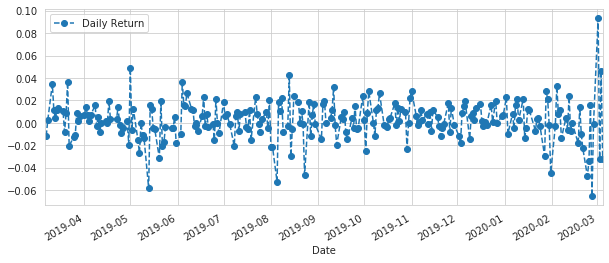

In [17]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

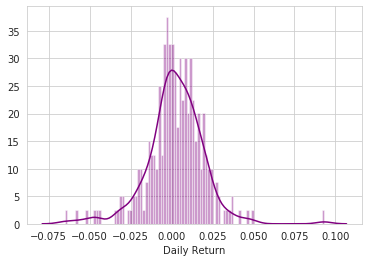

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

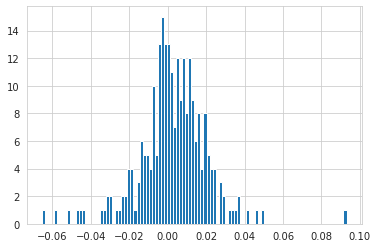

In [19]:
AAPL['Daily Return'].hist(bins=100)

In [0]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'], 'yahoo', start, end)['Adj Close']

In [21]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-03-06,172.265228,1157.859985,110.290787,1668.949951
2019-03-07,170.271317,1143.300049,108.948540,1625.949951
2019-03-08,170.676025,1142.319946,109.066978,1620.800049
2019-03-11,176.588608,1175.760010,111.356689,1670.619995
2019-03-12,178.572662,1193.199951,112.136368,1673.099976


In [0]:
tech_rets = closing_df.pct_change()

In [23]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-03-06,NaN,NaN,NaN,NaN
2019-03-07,-0.011575,-0.012575,-0.012170,-0.025765
2019-03-08,0.002377,-0.000857,0.001087,-0.003167
2019-03-11,0.034642,0.029274,0.020994,0.030738
2019-03-12,0.011235,0.014833,0.007002,0.001484
...,...,...,...,...
2020-02-28,-0.000585,0.016114,0.024213,-0.000292
2020-03-02,0.093101,0.037168,0.066539,0.037266
2020-03-03,-0.031759,-0.034353,-0.047919,-0.023010


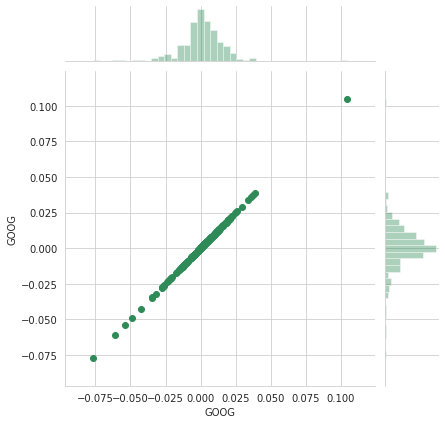

In [24]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

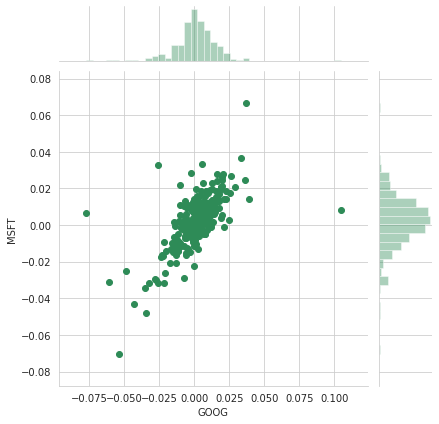

In [25]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

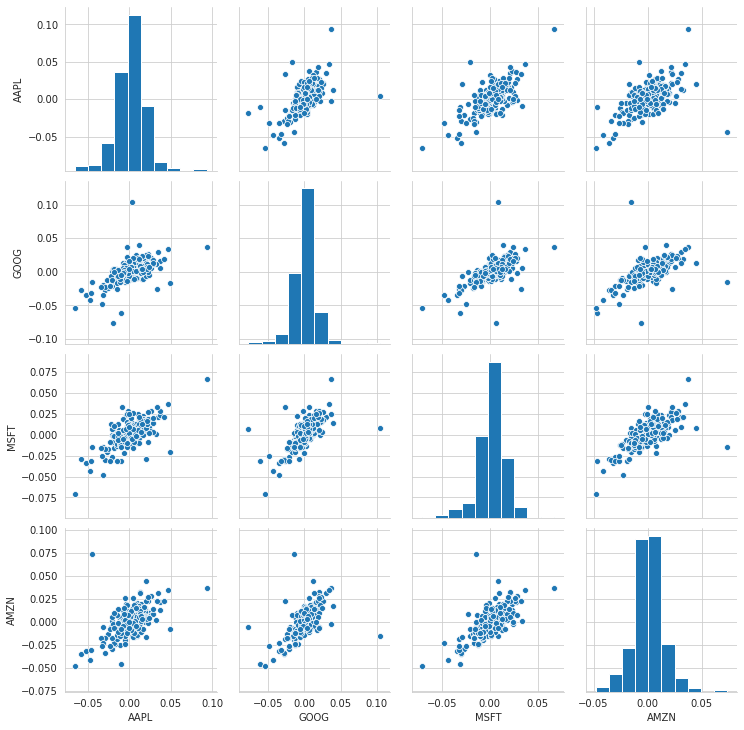

In [26]:
sns.pairplot(tech_rets.dropna())

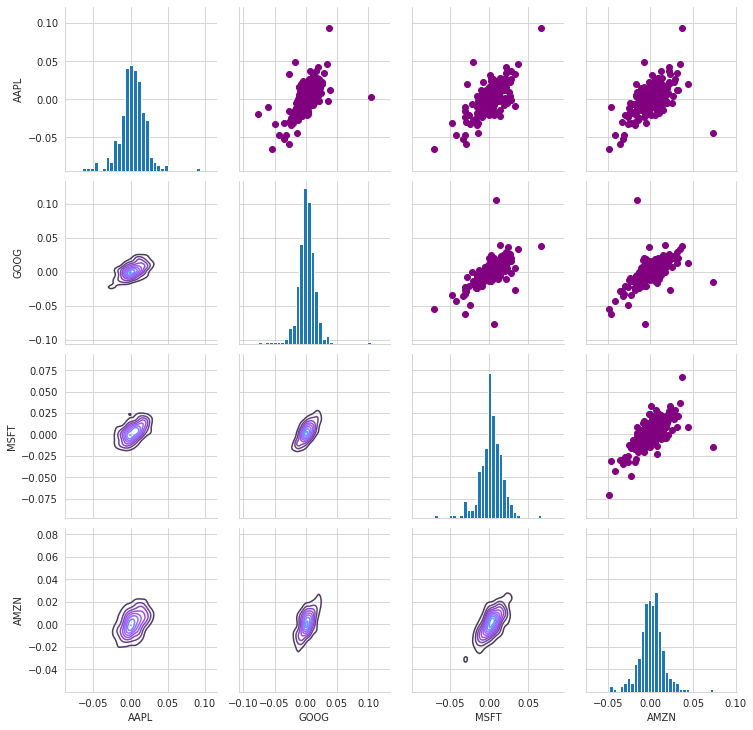

In [27]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

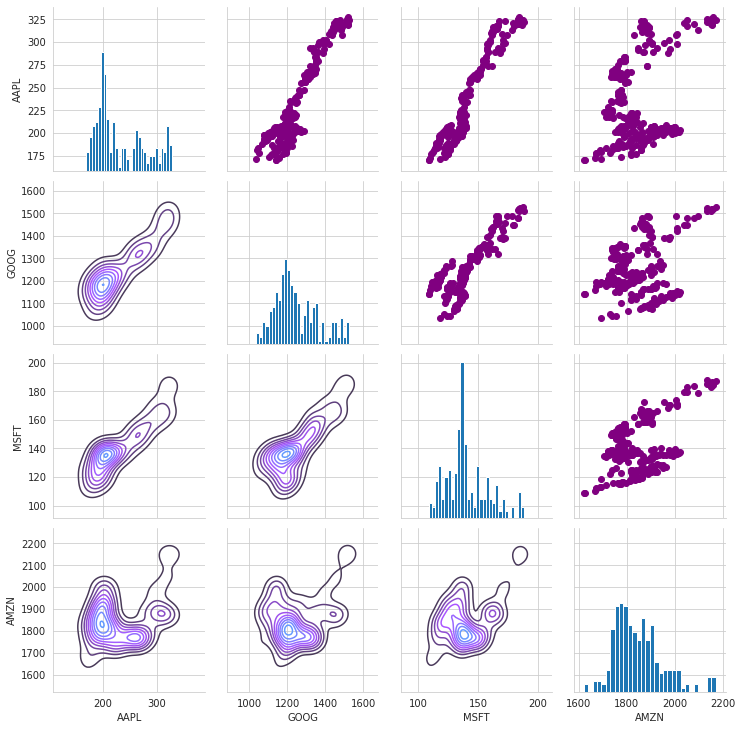

In [28]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

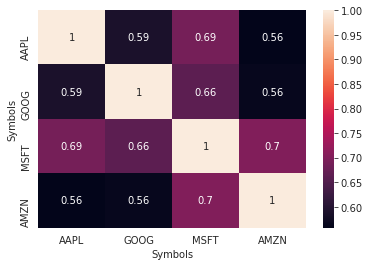

In [29]:
sns.heatmap(tech_rets.corr(), annot=True)

In [0]:
rets = tech_rets.dropna()

In [31]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-03-07,-0.011575,-0.012575,-0.012170,-0.025765
2019-03-08,0.002377,-0.000857,0.001087,-0.003167
2019-03-11,0.034642,0.029274,0.020994,0.030738
2019-03-12,0.011235,0.014833,0.007002,0.001484
2019-03-13,0.004422,0.000101,0.007745,0.010585


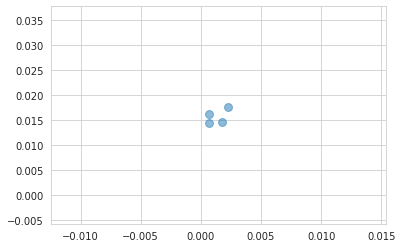

In [32]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)

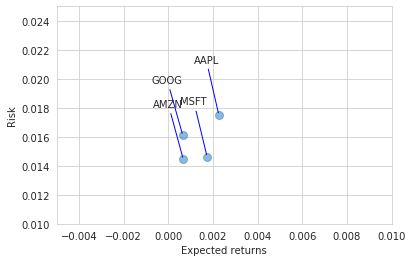

In [33]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x, y), xytext=(0,50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='blue'))

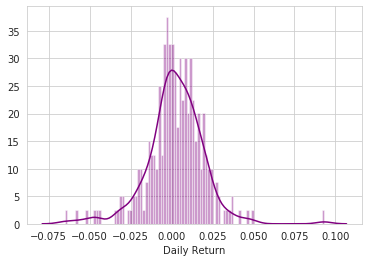

In [34]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [35]:
rets['AAPL'].quantile(0.05) # 

-0.025918002988520934

In [0]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [0]:
def stock_monte_carlo(start_price, days, mu, sigma):
  price = np.zeros(days)
  price[0] = start_price
  shock = np.zeros(days)
  drift = np.zeros(days)

  for x in range(1, days):
    shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
    drift[x] = mu * dt
    price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
  return price

In [40]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-06,1167.566040,1155.489990,1162.489990,1157.859985,1099300,1157.859985
2019-03-07,1156.755005,1134.910034,1155.719971,1143.300049,1166600,1143.300049
2019-03-08,1147.079956,1123.300049,1126.729980,1142.319946,1212400,1142.319946
2019-03-11,1176.189941,1144.449951,1144.449951,1175.760010,1719200,1175.760010
2019-03-12,1200.000000,1178.260010,1178.260010,1193.199951,2013100,1193.199951


Text(0.5, 1.0, 'Monte Carlo Analysis')

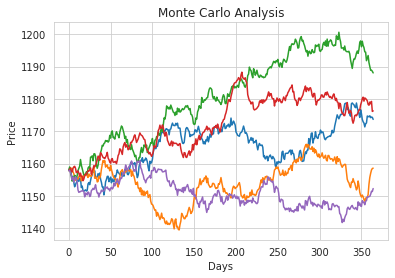

In [41]:
start_price = GOOG.iloc[0,5]

for run in range(5):
  plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
  
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [0]:
runs = 10000 # 1万回終値予測
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([1085.40673497, 1086.18641272, 1086.96609047, ..., 1239.78292908,
        1240.56260682, 1241.34228457]),
 <a list of 200 Patch objects>)

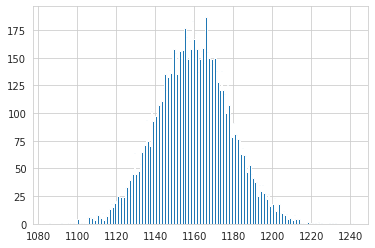

In [45]:
plt.hist(simulations, bins=200)

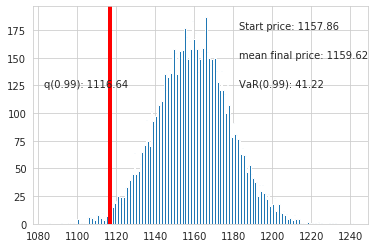

In [48]:
# Value at Riskを求める
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: {:0.2f}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price: {:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x=q, linewidth=4, color='r')